# Homework4

## Tasks:
- Clean up the CSV files found inside homework04_data.zip
- Combine all the files into a single file
- All invalid values must be dealt with and all columns must in with an appropriate range

## Table of contents
- Import and get to know the data
- Change the columns
- Tidy up the data format
- Missing Values
- Outliers

## Import and get to know the data

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
# Path
datadir_path = Path("../data/homework04_data")
cleaned_csv_path = Path("../data/cleaned_data.csv")

In [3]:
# CSV files in the data directory
!ls ../data/homework04_data

0.csv  16.csv 23.csv 30.csv 38.csv 45.csv 52.csv 6.csv  67.csv 74.csv 81.csv
1.csv  17.csv 24.csv 31.csv 39.csv 46.csv 53.csv 60.csv 68.csv 75.csv 82.csv
10.csv 18.csv 25.csv 32.csv 4.csv  47.csv 54.csv 61.csv 69.csv 76.csv 9.csv
11.csv 19.csv 26.csv 33.csv 40.csv 48.csv 55.csv 62.csv 7.csv  77.csv
12.csv 2.csv  27.csv 34.csv 41.csv 49.csv 56.csv 63.csv 70.csv 78.csv
13.csv 20.csv 28.csv 35.csv 42.csv 5.csv  57.csv 64.csv 71.csv 79.csv
14.csv 21.csv 29.csv 36.csv 43.csv 50.csv 58.csv 65.csv 72.csv 8.csv
15.csv 22.csv 3.csv  37.csv 44.csv 51.csv 59.csv 66.csv 73.csv 80.csv


In [4]:
# Create a list of file paths
csv_paths = sorted(list(datadir_path.glob("*")))
print("This is an example of file path: {}".format(csv_paths[0]))
print("The number of files we have: {}".format(len(csv_paths)))

This is an example of file path: ../data/homework04_data/0.csv
The number of files we have: 83


In [5]:
df_example = pd.read_csv(str(csv_paths[0]), index_col="ID")
df_example.head()

,age,sex,monthly income,work hours/week,favourite colour,siblings,top finish placement,last time,bed time,wake up time,total sleep/night,caloric intake,steps taken
ID,,,,,,,,,,,,,
1,11,male,$3058.0,19,green,4,5th,27secs,11:45:32.334PM,10:41:17.64AM,-5.01,2000,2000200020002000200020002000200020002000200020...
2,33,m,0,53,BLUE,5,1st,29secs,8:3:40.514PM,8:56:47.711AM,8.35,3750,NaN
3,37,m,$3108.0,27,gReeN,5,8th,22secs,11:21:53.189PM,10:21:49.198AM,-1.78,2250,2250225022502250225022502250225022502250225022...
4,88,male,$23408.0,12,gReeN,0,6th,26secs,2:37:12.32AM,7:27:14.54AM,11.44,1750,1750175017501750175017501750175017501750
5,0,M,$17840.0,50,None,3,9th,27secs,7:31:1.947PM,11:20:15.527AM,11.44,3750,3750375037503750375037503750375037503750


In [6]:
columns = df_example.columns.tolist()

In [7]:
def concat_csv(csv_files):
    """
    Concatenate csv files and create a Pandas DataFrame
    
    Parameters
    ----------------
    csv_files: list
        Contains file paths to each csv file
        
    Return
    ---------
    df: Pandas DataFrame
    A Pandas DataFrame containing information of all the csv files.
    """
    li = []
    for csv_path in tqdm(csv_files):
        df_tmp = pd.read_csv(str(csv_path), index_col="ID", header=0)
        if df_tmp.columns.tolist() == columns:
            li.append(df_tmp)
        else:
            print("The list of columns of {} doesn't match.".format(csv_path))
            print("The columns are {}: ".format(df_tmp.columns.tolist()))
    df = pd.concat(li, axis=0, ignore_index=False)
    return df

In [8]:
df = concat_csv(csv_paths)
df.head()

,age,sex,monthly income,work hours/week,favourite colour,siblings,top finish placement,last time,bed time,wake up time,total sleep/night,caloric intake,steps taken
ID,,,,,,,,,,,,,
1,11,male,$3058.0,19,green,4,5th,27secs,11:45:32.334PM,10:41:17.64AM,-5.01,2000,2000200020002000200020002000200020002000200020...
2,33,m,0,53,BLUE,5,1st,29secs,8:3:40.514PM,8:56:47.711AM,8.35,3750,NaN
3,37,m,$3108.0,27,gReeN,5,8th,22secs,11:21:53.189PM,10:21:49.198AM,-1.78,2250,2250225022502250225022502250225022502250225022...
4,88,male,$23408.0,12,gReeN,0,6th,26secs,2:37:12.32AM,7:27:14.54AM,11.44,1750,1750175017501750175017501750175017501750
5,0,M,$17840.0,50,None,3,9th,27secs,7:31:1.947PM,11:20:15.527AM,11.44,3750,3750375037503750375037503750375037503750


In [9]:
print("====================================")
print("Shape: {}".format(df.shape))
print("====================================")
df.info()
print("====================================")
df.describe()

Shape: (1000000, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 1 to 70496
Data columns (total 13 columns):
age                     1000000 non-null int64
sex                     1000000 non-null object
monthly income          1000000 non-null object
work hours/week         1000000 non-null int64
favourite colour        1000000 non-null object
siblings                1000000 non-null int64
top finish placement    1000000 non-null object
last time               1000000 non-null object
bed time                1000000 non-null object
wake up time            1000000 non-null object
total sleep/night       1000000 non-null float64
caloric intake          1000000 non-null int64
steps taken             669855 non-null object
dtypes: float64(1), int64(4), object(8)
memory usage: 106.8+ MB


,age,work hours/week,siblings,total sleep/night,caloric intake
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,48.140979,41.700051,4.466983,-0.004699,2604.819000
std,24.513761,21.876296,2.888980,7.182218,750.914137
min,0.000000,0.000000,0.000000,-12.500000,0.000000
25%,27.000000,23.000000,2.000000,-6.200000,2000.000000
50%,48.000000,42.000000,4.000000,0.000000,2500.000000
75%,69.000000,61.000000,7.000000,6.190000,3250.000000
max,90.000000,79.000000,9.000000,12.500000,3750.000000


## Fix the columns
Some of the columns in the dataset have spaces or special character such as `/` in the column name which make me confused, and it is hard to deal with for further work. So I will fix this before everything I do.

In [10]:
dataset = df.copy()

In [11]:
dataset.columns.tolist()

['age',
 'sex',
 'monthly income',
 'work hours/week',
 'favourite colour',
 'siblings',
 'top finish placement',
 'last time',
 'bed time',
 'wake up time',
 'total sleep/night',
 'caloric intake',
 'steps taken']

In [12]:
new_columns = ["Age",
                         "Sex",
                         "M_income",
                         "Work",
                         "Color",
                         "Sibs",
                         "TFP",
                         "Ltime",
                         "Btime",
                         "Wtime",
                         "Tsleep",
                         "Caloric",
                         "Steps"]
dataset.columns = new_columns
dataset.head()

,Age,Sex,M_income,Work,Color,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Steps
ID,,,,,,,,,,,,,
1,11,male,$3058.0,19,green,4,5th,27secs,11:45:32.334PM,10:41:17.64AM,-5.01,2000,2000200020002000200020002000200020002000200020...
2,33,m,0,53,BLUE,5,1st,29secs,8:3:40.514PM,8:56:47.711AM,8.35,3750,NaN
3,37,m,$3108.0,27,gReeN,5,8th,22secs,11:21:53.189PM,10:21:49.198AM,-1.78,2250,2250225022502250225022502250225022502250225022...
4,88,male,$23408.0,12,gReeN,0,6th,26secs,2:37:12.32AM,7:27:14.54AM,11.44,1750,1750175017501750175017501750175017501750
5,0,M,$17840.0,50,None,3,9th,27secs,7:31:1.947PM,11:20:15.527AM,11.44,3750,3750375037503750375037503750375037503750


# Tidy up the data format
The next thing I will do is clean up the format of each column. For example, in `Sex` column, we have `male`, `m`, `M`, and so on. What I want is only `Male` or `Female`.  So I am going to check the unique values in each column and fix them.

- ### Age column

In [13]:
dataset["Age"].unique()

array([11, 33, 37, 88,  0, 90, 29, 27, 68, 66, 89, 19, 44, 57, 38, 86, 43,
       10, 67, 23, 36,  8, 63, 58, 25, 32, 55, 21, 73, 39, 17, 85, 64, 56,
       47, 40, 50, 61, 30, 14, 26, 42, 59,  7, 24, 52, 12, 22, 28, 84, 83,
       31, 78, 53, 41, 45, 70, 75, 48, 65, 34, 51, 87, 81, 79, 60, 16, 62,
       35, 49, 76, 69, 54, 20, 71, 46, 80, 77, 15, 82, 18, 74, 13,  9, 72])

Seems good except for `0` which I will work on later in `Outliers` section.

- ### Sex column

In [14]:
dataset["Sex"].value_counts()

female    110771
M         110561
Female    110533
F         110470
f         110419
Male      110047
X         109943
m         109776
male      109754
0           7726
Name: Sex, dtype: int64

|Current Values|Fixed Values for now|
|-|-|
|female|Female|
|M|Male|
|Female|Female (The same)|
|F|Female|
|f|Female|
|Male|Male (The same)|
|X|X (Leave this as it is for now)|
|m|Male|
|male|Male|
|0|X (Replace to X in order to work on easily for later on)|

In [15]:
dataset["Sex"] = dataset["Sex"].replace("female", "Female")
dataset["Sex"] = dataset["Sex"].replace("F", "Female")
dataset["Sex"] = dataset["Sex"].replace("f", "Female")
dataset["Sex"] = dataset["Sex"].replace("male", "Male")
dataset["Sex"] = dataset["Sex"].replace("M", "Male")
dataset["Sex"] = dataset["Sex"].replace("m", "Male")
dataset["Sex"] = dataset["Sex"].replace("0", "X")

In [16]:
dataset["Sex"].value_counts()

Female    442193
Male      440138
X         117669
Name: Sex, dtype: int64

I will work on the `X`s in the `Outliers` section.

- ### M_income

In this column, what I need to do is get rid of the `$` and to convert the values to `float` type.

In [17]:
def remove_doller(x):
    """
    Remove $ mark from the input.
    
    Parameters
    ----------------
    x: str
        Monthly income. An example: "$3058.0"
        
    Return
    ---------
    income: str
        Monthly income without "$". An example: "3058.0"
    """
    if "$" in x:
        income = x.split("$")[1]
        return income
    else:
        income = x
        return income

In [18]:
dataset["M_income"] = dataset["M_income"].map(remove_doller).astype("float32")
dataset.head()

,Age,Sex,M_income,Work,Color,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Steps
ID,,,,,,,,,,,,,
1,11,Male,3058.0,19,green,4,5th,27secs,11:45:32.334PM,10:41:17.64AM,-5.01,2000,2000200020002000200020002000200020002000200020...
2,33,Male,0.0,53,BLUE,5,1st,29secs,8:3:40.514PM,8:56:47.711AM,8.35,3750,NaN
3,37,Male,3108.0,27,gReeN,5,8th,22secs,11:21:53.189PM,10:21:49.198AM,-1.78,2250,2250225022502250225022502250225022502250225022...
4,88,Male,23408.0,12,gReeN,0,6th,26secs,2:37:12.32AM,7:27:14.54AM,11.44,1750,1750175017501750175017501750175017501750
5,0,Male,17840.0,50,None,3,9th,27secs,7:31:1.947PM,11:20:15.527AM,11.44,3750,3750375037503750375037503750375037503750


- ### Work

In [19]:
dataset["Work"].unique()

array([19, 53, 27, 12, 50, 45, 71, 52,  8, 60, 49, 79, 48, 10, 56, 54, 68,
       40, 37, 23, 13, 25, 22, 15, 29, 69,  7, 28, 14, 16, 17, 63, 65, 18,
       72, 57, 67, 39, 66, 78, 73, 74, 35, 55, 44, 41, 47, 42,  6, 21, 31,
       32, 76, 26, 61,  9, 75, 59, 20, 11, 36, 43, 70, 24, 58, 51, 34, 38,
       33, 30, 62, 64, 77, 46,  5,  0])

In [20]:
dataset[dataset["Work"] == 0].head()

,Age,Sex,M_income,Work,Color,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Steps
ID,,,,,,,,,,,,,
423,54,Male,14040.0,0,yellow,3,9th,30secs,9:15:49.349PM,10:24:34.425AM,4.85,2000,2000200020002000200020002000200020002000200020...
716,14,X,2002.0,0,green,3,4th,24secs,7:25:52.826PM,12:3:15.364PM,-2.03,2250,2250225022502250225022502250225022502250
859,76,Female,5092.0,0,red,1,2nd,29secs,3:40:38.146AM,5:51:30.266AM,6.44,2000,2000200020002000200020002000200020002000
1008,15,Female,2340.0,0,reD,2,8th,30secs,3:40:57.255AM,11:42:31.709AM,12.03,3250,NaN
1128,58,Male,16820.0,0,green,9,4th,25secs,3:37:8.513AM,5:41:45.459AM,4.62,3750,NaN


In [21]:
print("The number of rows that have 0s in Work column: {}".format(dataset[dataset["Work"] == 0].shape[0]))

The number of rows that have 0s in Work column: 7601


We have `0`s but we don't have negative values which is good. And all of them are integers which is also nice. I will work on `0`s in `Outliers` section.

- ### Color

In [22]:
dataset["Color"].value_counts()

yellow    124433
green     124333
BLUE      124255
reD       124142
red       124018
blue      123943
gReeN     123718
None      123466
0           7692
Name: Color, dtype: int64

|Current Values|Fixed Values|
|-|-|
|yellow|yellow (No need to fix)|
|green|green (No need to fix)|
|BLUE|blue|
|reD|red|
|red|red (No need to fix)|
|blue|blue|
|gReeN|green|
|None|0 (In order to work on easily)|
|0|Leave this as it is|

In [23]:
dataset[dataset["Color"] == "0"].head()

,Age,Sex,M_income,Work,Color,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Steps
ID,,,,,,,,,,,,,
11,89,Male,7387.0,8,0,7,4th,28secs,9:15:24.751PM,10:51:46.507AM,-5.90,3750,3750375037503750375037503750375037503750375037...
211,71,Female,19880.0,43,0,5,9th,22secs,9:25:11.871PM,11:35:52.983AM,-6.65,2500,25002500250025002500
326,45,Male,8820.0,15,0,6,7th,30secs,7:17:13.258PM,5:57:30.735AM,-11.78,1500,1500150015001500150015001500150015001500150015...
357,22,Male,5918.0,45,0,9,5th,20secs,2:34:10.533AM,12:26:36.454PM,0.77,3500,NaN
660,17,Female,4318.0,65,0,8,5th,29secs,1:39:13.280AM,5:56:43.585AM,-10.80,2250,NaN


In [24]:
dataset["Color"] = dataset["Color"].replace("BLUE", "blue")
dataset["Color"] = dataset["Color"].replace("reD", "red")
dataset["Color"] = dataset["Color"].replace("gReeN", "green")
dataset["Color"] = dataset["Color"].replace("None", "0")
dataset["Color"].value_counts()

blue      248198
red       248160
green     248051
0         131158
yellow    124433
Name: Color, dtype: int64

We still have `0`s in `Color` column but I just leave them there for now. I will workon them in `Outliers` section. 

- ### Sibs

In [25]:
dataset["Sibs"].value_counts()

0    107094
7     99615
8     99503
2     99480
9     99224
3     99199
5     99039
4     99025
6     98993
1     98828
Name: Sibs, dtype: int64

Seems good.

- ### TFP

In [26]:
dataset["TFP"].unique()

array(['5th', '1st', '8th', '6th', '9th', '4th', '7th', '2nd', '3rd', '0'],
      dtype=object)

It's better to get rid of the suffixes and to convert the values to integers.

In [27]:
def remove_suffixes(x):
    """
    Remove the suffix from the input such as `st`, `nd`, etc.
    
    Parameters
    ----------------
    x: str
        placement such as `1st`, `2nd`, etc
    
    Return
    ---------
    placement: str
        placement without suffix: Examples: `1`, `2`, etc
    """
    placement = x[0]
    return placement

In [28]:
dataset["TFP"] = dataset["TFP"].map(remove_suffixes).astype("int32")

In [29]:
dataset["TFP"].unique()

array([5, 1, 8, 6, 9, 4, 7, 2, 3, 0])

In [30]:
print("The number of rows that have 0s in TFP column: {}".format(dataset[dataset["TFP"] == 0].shape[0]))

The number of rows that have 0s in TFP column: 7652


There shoudn't be `0`s in this column so I will work on these `0`s in `Outliers` section. 

- ### Ltime

In [31]:
dataset["Ltime"].unique()

array(['27secs', '29secs', '22secs', '26secs', '24secs', '23secs',
       '28secs', '20secs', '30secs', '21secs', '25secs', '0'],
      dtype=object)

As I just did for the `TFP` column, I am going to remove `secs` and to convert to integers.

In [32]:
def remove_secs(x):
    """
    Remove `secs` from the input.
    
    Parameters
    ----------------
    x: str
        Second. Examples: `27secs`, `29secs`, etc
    
    Return
    ---------
    sec: str
        Second without `secs`. Examples: `27`, `29`, etc
    """
    sec = x.split("s")[0]
    return sec

In [33]:
dataset["Ltime"] = dataset["Ltime"].map(remove_secs).astype("int32")
dataset["Ltime"].unique()

array([27, 29, 22, 26, 24, 23, 28, 20, 30, 21, 25,  0])

In [34]:
print("The number of rows that have 0s in Ltime column: {}".format(dataset[dataset["Ltime"] == 0].shape[0]))

The number of rows that have 0s in Ltime column: 7786


`0`s could be ourliers.Will look into more in `Outliers` section.

- ### Btime and Wtime

In order to easily deal with these columns later, I am going to use just the hours and to convert the time to military time. The data time will be integers.

In [35]:
def change_time(x):
    """
    Clean up the time. Convert the given format to only "hour" in military time.
    For example:
    Input                        output
    '2:37:12.32AM'     -> '2'
    '11:45:32.334PM' -> '23'
    '12:34:49.194PM' -> '12'
    '12:34:49.194AM' -> '0'
    
    Parameters
    ----------------
    x: str
        Time containing minutes, secounds, etc
    
    Return
    ---------
    time: int
        Time: just "hour"
    """
    if x == "0":
        return int(x)
    
    time = x.split(".")[0].split(":")[0]  # Get only hour
    try:
        suffix = x.split(".")[1][-2:]  # Get AM or PM
    except:
        print("This is x {}".format(x))
        
    if suffix == "AM":
        if time == "12":
            return 0
        else:
            return int(time)
    else:
        if time == "12":
            return 12
        else:
            time = int(time) + 12
            return time

In [36]:
dataset["Btime"] = dataset["Btime"].map(change_time)
dataset["Wtime"] = dataset["Wtime"].map(change_time)
dataset.head()

,Age,Sex,M_income,Work,Color,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Steps
ID,,,,,,,,,,,,,
1,11,Male,3058.0,19,green,4,5,27,23,10,-5.01,2000,2000200020002000200020002000200020002000200020...
2,33,Male,0.0,53,blue,5,1,29,20,8,8.35,3750,NaN
3,37,Male,3108.0,27,green,5,8,22,23,10,-1.78,2250,2250225022502250225022502250225022502250225022...
4,88,Male,23408.0,12,green,0,6,26,2,7,11.44,1750,1750175017501750175017501750175017501750
5,0,Male,17840.0,50,0,3,9,27,19,11,11.44,3750,3750375037503750375037503750375037503750


- ### Tsleep

In this column, I can find negative values in spite of the column indicates `total speep time / night`. So I am going to fix the negative values by taking absolute values so that everything is going to be positive.

In [37]:
f = lambda x: np.abs(x)
dataset["Tsleep"] = dataset["Tsleep"].map(f)
dataset.head()

,Age,Sex,M_income,Work,Color,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Steps
ID,,,,,,,,,,,,,
1,11,Male,3058.0,19,green,4,5,27,23,10,5.01,2000,2000200020002000200020002000200020002000200020...
2,33,Male,0.0,53,blue,5,1,29,20,8,8.35,3750,NaN
3,37,Male,3108.0,27,green,5,8,22,23,10,1.78,2250,2250225022502250225022502250225022502250225022...
4,88,Male,23408.0,12,green,0,6,26,2,7,11.44,1750,1750175017501750175017501750175017501750
5,0,Male,17840.0,50,0,3,9,27,19,11,11.44,3750,3750375037503750375037503750375037503750


- ### Caloric

In [38]:
dataset["Caloric"].unique()

array([2000, 3750, 2250, 1750, 3500, 2500, 3000, 1500, 3250, 2750,    0])

In [39]:
print("the number od rows that have 0s in Caloric column: {}".format(dataset[dataset["Caloric"] == 0].shape[0]))

the number od rows that have 0s in Caloric column: 7679


Seems good. But `0`s could be outliers. Will look into more in `Outliers` section.

- ### Steps

In [40]:
dataset["Steps"].unique()

array(['20002000200020002000200020002000200020002000200020002000200020002000200020002000',
       nan,
       '22502250225022502250225022502250225022502250225022502250225022502250225022502250',
       '1750175017501750175017501750175017501750',
       '3750375037503750375037503750375037503750',
       '2250225022502250225022502250225022502250',
       '350035003500350035003500350035003500350035003500350035003500',
       '25002500250025002500', '15001500150015001500',
       '375037503750375037503750375037503750375037503750375037503750',
       '2000200020002000200020002000200020002000', '30003000300030003000',
       '3000300030003000300030003000300030003000',
       '150015001500150015001500150015001500150015001500150015001500',
       '32503250325032503250', '3500350035003500350035003500350035003500',
       '275027502750275027502750275027502750275027502750275027502750',
       '15001500150015001500150015001500150015001500150015001500150015001500150015001500',
       '37503750375037

OK, it seems like complicated but there can be patterns that several 4-digit numbers are being laid down.
So I am going to replace the values to just the first 4 numbers of each value as a float.

In [41]:
def replace_steps(x):
    """
    Replace the values in the `Steps` column.
    
    Parameter
    --------------
    x: str
        An example: '37503750375037503750'
    
    Return
    ---------
    x_fixed: str
        An example: '3750'
    """
    if x == "0" or type(x) == float:
        return x
    else:
        x_fixed = x[:4]
        return x_fixed

In [42]:
dataset["Steps"] = dataset["Steps"].map(replace_steps).astype("float32")
dataset["Steps"].unique()

array([2000.,   nan, 2250., 1750., 3750., 3500., 2500., 1500., 3000.,
       3250., 2750.,    0.])

In [43]:
dataset.head()

,Age,Sex,M_income,Work,Color,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Steps
ID,,,,,,,,,,,,,
1,11,Male,3058.0,19,green,4,5,27,23,10,5.01,2000,2000.0
2,33,Male,0.0,53,blue,5,1,29,20,8,8.35,3750,NaN
3,37,Male,3108.0,27,green,5,8,22,23,10,1.78,2250,2250.0
4,88,Male,23408.0,12,green,0,6,26,2,7,11.44,1750,1750.0
5,0,Male,17840.0,50,0,3,9,27,19,11,11.44,3750,3750.0


I will work on the `nan`s in `Missing Values` section, which is the next, and will work on `0`s in `Outliers` section because they could be outliers.

# Missing Values

Just a recap, what I have done so far is
- Changed the name of columns to make easy to work on.
- Cleaned up the data format.

The next thing I am going to is fill in the blank in the dataset.

In [44]:
dataset_missing = dataset.copy()

In [45]:
dataset_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 1 to 70496
Data columns (total 13 columns):
Age         1000000 non-null int64
Sex         1000000 non-null object
M_income    1000000 non-null float32
Work        1000000 non-null int64
Color       1000000 non-null object
Sibs        1000000 non-null int64
TFP         1000000 non-null int32
Ltime       1000000 non-null int32
Btime       1000000 non-null int64
Wtime       1000000 non-null int64
Tsleep      1000000 non-null float64
Caloric     1000000 non-null int64
Steps       669855 non-null float32
dtypes: float32(2), float64(1), int32(2), int64(6), object(2)
memory usage: 91.6+ MB


In [46]:
dataset_missing.columns[dataset_missing.isnull().any()]

Index(['Steps'], dtype='object')

In [47]:
dataset_missing.corr()

,Age,M_income,Work,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Steps
Age,1.000000,0.642688,-0.000267,0.001827,0.000075,-0.001050,-0.000935,0.000515,0.000182,-0.000123,-0.001149
M_income,0.642688,1.000000,-0.000269,0.002367,-0.001172,-0.001307,-0.001882,0.000166,0.001571,-0.001160,-0.001565
Work,-0.000267,-0.000269,1.000000,-0.001201,0.000862,0.000397,-0.001250,-0.000892,-0.001277,-0.001238,-0.002356
Sibs,0.001827,0.002367,-0.001201,1.000000,-0.000250,0.000525,0.000319,0.000197,0.000050,-0.000360,-0.000740
TFP,0.000075,-0.001172,0.000862,-0.000250,1.000000,-0.000417,-0.000218,0.000207,0.002838,-0.000555,-0.001917
Ltime,-0.001050,-0.001307,0.000397,0.000525,-0.000417,1.000000,-0.001752,-0.001779,-0.000032,0.000837,0.001817
Btime,-0.000935,-0.001882,-0.001250,0.000319,-0.000218,-0.001752,1.000000,-0.000861,0.001704,-0.000440,0.000039
Wtime,0.000515,0.000166,-0.000892,0.000197,0.000207,-0.001779,-0.000861,1.000000,0.000427,-0.001481,-0.000968
Tsleep,0.000182,0.001571,-0.001277,0.000050,0.002838,-0.000032,0.001704,0.000427,1.000000,-0.000574,-0.000334
Caloric,-0.000123,-0.001160,-0.001238,-0.000360,-0.000555,0.000837,-0.000440,-0.001481,-0.000574,1.000000,0.877964


In [48]:
dataset_missing.head()

,Age,Sex,M_income,Work,Color,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Steps
ID,,,,,,,,,,,,,
1,11,Male,3058.0,19,green,4,5,27,23,10,5.01,2000,2000.0
2,33,Male,0.0,53,blue,5,1,29,20,8,8.35,3750,NaN
3,37,Male,3108.0,27,green,5,8,22,23,10,1.78,2250,2250.0
4,88,Male,23408.0,12,green,0,6,26,2,7,11.44,1750,1750.0
5,0,Male,17840.0,50,0,3,9,27,19,11,11.44,3750,3750.0


- ### Steps

The correlation table above shows that the `Caloric` has a strong correlation with `Steps`.
And the values in `Caloric` and `Steps` are the same in a row. So I am going to use the values in `Caloric` to fill the missing values in `Steps`. Eventually, the two columns will end up having `1` correlation between them so I can get rid of one of them.

Just in case, create a scatter plot to see the relationship between `Caloric` and `Steps`.

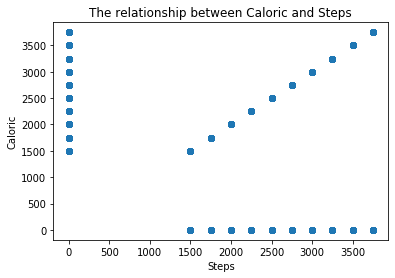

In [49]:
cal_vals = dataset_missing["Caloric"][dataset_missing["Steps"].notnull()]
steps_vals = dataset_missing["Steps"][dataset_missing["Steps"].notnull()]
plt.scatter(steps_vals, cal_vals)
plt.title("The relationship between Caloric and Steps")
plt.xlabel("Steps")
plt.ylabel("Caloric");

Interesting!!
So the solution is shown in the table below.

|Caloric|Steps|Solution|
|-|-|-|
|values|values|When both columns have a value, they are exact the same with each other.|
|0s|values|Assign the values in `Steps` to places where there are 0s in `Caloric` respectively.|
|values|0s|Assign the values in `Caloric` to places where there are 0s in `Steps` respectively.|
|0s|nans|Take the mean of `Caloric` (without 0s) and use that value to fix 0s in `Caloric` and blanks in `Steps`.|

In [50]:
dataset_missing["Steps"].isnull().sum()

330145

In [51]:
dataset_missing["Caloric"].isnull().sum()

0

In [52]:
df_tmp = dataset_missing[dataset_missing["Steps"].isnull()]
df_tmp[df_tmp["Caloric"] == 0]
df_tmp.shape

(330145, 13)

OK, all the rows which have `nan`s in `Steps` have `0`s in `Caloric` column so I am going to replace the `nan`s to `0`s in `Steps` column.

In [53]:
dataset_missing["Steps"].fillna(0, inplace=True)
dataset_missing["Steps"].isnull().sum()

0

Now we have the the columns like this

|Caloric|Steps|
|-|-|
|values|values|
|0s|values|
|values|0s|
|0s|0s|

I just filled missing values and will deal with the `0`s in both columns in `Outliers`section, which is the next.

In [54]:
dataset = dataset_missing

# Outliers

In [55]:
dataset_outliers = dataset.copy()

In [56]:
dataset_outliers.head()

,Age,Sex,M_income,Work,Color,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Steps
ID,,,,,,,,,,,,,
1,11,Male,3058.0,19,green,4,5,27,23,10,5.01,2000,2000.0
2,33,Male,0.0,53,blue,5,1,29,20,8,8.35,3750,0.0
3,37,Male,3108.0,27,green,5,8,22,23,10,1.78,2250,2250.0
4,88,Male,23408.0,12,green,0,6,26,2,7,11.44,1750,1750.0
5,0,Male,17840.0,50,0,3,9,27,19,11,11.44,3750,3750.0


In [57]:
dataset_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 1 to 70496
Data columns (total 13 columns):
Age         1000000 non-null int64
Sex         1000000 non-null object
M_income    1000000 non-null float32
Work        1000000 non-null int64
Color       1000000 non-null object
Sibs        1000000 non-null int64
TFP         1000000 non-null int32
Ltime       1000000 non-null int32
Btime       1000000 non-null int64
Wtime       1000000 non-null int64
Tsleep      1000000 non-null float64
Caloric     1000000 non-null int64
Steps       1000000 non-null float32
dtypes: float32(2), float64(1), int32(2), int64(6), object(2)
memory usage: 91.6+ MB


In [58]:
dataset_outliers.corr()

,Age,M_income,Work,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Steps
Age,1.000000,0.642688,-0.000267,0.001827,0.000075,-0.001050,-0.000935,0.000515,0.000182,-0.000123,0.001172
M_income,0.642688,1.000000,-0.000269,0.002367,-0.001172,-0.001307,-0.001882,0.000166,0.001571,-0.001160,0.001179
Work,-0.000267,-0.000269,1.000000,-0.001201,0.000862,0.000397,-0.001250,-0.000892,-0.001277,-0.001238,0.000047
Sibs,0.001827,0.002367,-0.001201,1.000000,-0.000250,0.000525,0.000319,0.000197,0.000050,-0.000360,-0.001933
TFP,0.000075,-0.001172,0.000862,-0.000250,1.000000,-0.000417,-0.000218,0.000207,0.002838,-0.000555,-0.000887
Ltime,-0.001050,-0.001307,0.000397,0.000525,-0.000417,1.000000,-0.001752,-0.001779,-0.000032,0.000837,0.001892
Btime,-0.000935,-0.001882,-0.001250,0.000319,-0.000218,-0.001752,1.000000,-0.000861,0.001704,-0.000440,-0.001095
Wtime,0.000515,0.000166,-0.000892,0.000197,0.000207,-0.001779,-0.000861,1.000000,0.000427,-0.001481,-0.002689
Tsleep,0.000182,0.001571,-0.001277,0.000050,0.002838,-0.000032,0.001704,0.000427,1.000000,-0.000574,0.000218
Caloric,-0.000123,-0.001160,-0.001238,-0.000360,-0.000555,0.000837,-0.000440,-0.001481,-0.000574,1.000000,0.329212


In [59]:
dataset_outliers.describe()

,Age,M_income,Work,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Steps
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,48.140979,7701.025879,41.700051,4.466983,4.96396,24.804120,12.603700,8.435807,6.195786,2604.819000,1738.743896
std,24.513761,5869.445312,21.876296,2.888980,2.60794,3.841054,8.846513,2.402210,3.632695,750.914137,1372.158936
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,2898.000000,23.000000,2.000000,3.00000,22.000000,3.000000,6.000000,3.050000,2000.000000,0.000000
50%,48.000000,6160.000000,42.000000,4.000000,5.00000,25.000000,12.000000,8.000000,6.190000,2500.000000,2000.000000
75%,69.000000,11319.000000,61.000000,7.000000,7.00000,28.000000,21.000000,10.000000,9.340000,3250.000000,3000.000000
max,90.000000,27000.000000,79.000000,9.000000,9.00000,30.000000,23.000000,12.000000,12.500000,3750.000000,3750.000000


I am going to check if there are any outliers in each column by creating a plot for each column.

- ### Age

In [60]:
dataset[(dataset["Age"] == 0) & (dataset["M_income"] == 0)].shape

(0, 13)

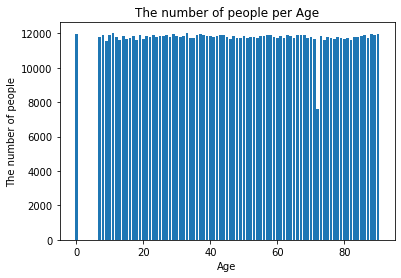

In [61]:
plt.bar(dataset_outliers["Age"].unique(), dataset_outliers["Age"].value_counts())
plt.title("The number of people per Age")
plt.xlabel("Age")
plt.ylabel("The number of people");

In [62]:
dataset_outliers.groupby("Age").mean()

,M_income,Work,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Steps
Age,,,,,,,,,,
0,7738.124512,42.139843,4.481127,5.053866,25.063303,12.518349,8.521232,6.211588,2624.082569,1748.034058
7,1099.204834,41.885790,4.484990,5.000085,24.816481,12.775916,8.436602,6.165462,2603.069989,1744.706177
8,1279.829468,41.696022,4.454660,4.940755,24.782066,12.669139,8.418422,6.194992,2599.696612,1732.176025
9,1430.428955,41.534911,4.438822,4.955354,24.780715,12.521316,8.456109,6.216975,2602.970796,1756.210083
10,1592.564697,41.618126,4.448689,4.960082,24.788847,12.736251,8.420935,6.232084,2600.843755,1749.764404
11,1740.155029,42.044821,4.464590,4.950114,24.825779,12.583608,8.417068,6.218920,2604.372415,1736.072388
12,1902.896240,41.585916,4.428439,4.979313,24.761969,12.548510,8.438065,6.241754,2597.673731,1732.626831
13,2065.238525,41.784964,4.457924,4.942418,24.838274,12.593165,8.411448,6.192336,2603.246476,1736.843262
14,2214.750977,41.925529,4.448796,4.933585,24.837775,12.584626,8.362328,6.176062,2613.891507,1746.464966


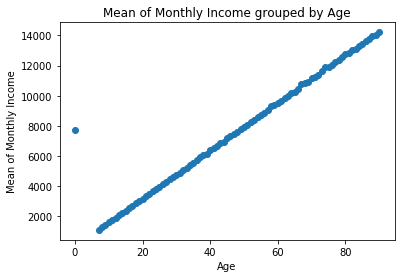

In [63]:
plt.scatter(sorted(dataset_outliers["Age"].unique()), dataset_outliers.groupby("Age").mean()["M_income"])
plt.xlabel("Age")
plt.ylabel("Mean of Monthly Income")
plt.title("Mean of Monthly Income grouped by Age");

**About the `Age` column**<br>
The range of `Age` is between 7 and 90, and there is no missing age between the range. I am not sure why it is started from 7. If it starts from 20 or something like, and then I have 7, it could be an outlier.
But in this case, I define only `Age` 0 as an outlier because I don't have any reasons to define younger ages as outliers.

**Solution**<br>
Create a function that calculates the difference between a value of `M_income` in a row and each average of `M_income` per `Age`.
Then replace the age `0` to an age whose average is the most closest to actual `M_income` value.
*For example:*
Observation1:
Age: 0
M_income: 3000.0

The M_income is close to the average `19`, which you can see the table above.
So I will replace the `Age` of `Observation1` to `19`.

In [64]:
ages = dataset_outliers["Age"].value_counts().sort_index().index.tolist()[1:]

In [65]:
income_avg = dataset_outliers.groupby("Age").mean()["M_income"].tolist()[1:]
income_avg = np.array(income_avg)

In [66]:
def replace_age(x):
    """
    Guess age of an observation based on their M_income.
    Calculates the difference between a value of M_income in a row and each average of M_income per Age.
    Then replace the age 0 to an age whose average is the most closest to actual M_income value.
    
    Parameters
    ----------------
    x: int
        A value of M_income
        
    Return
    ---------
    age: int
        Age of an observation
    """
    
    income_diff = income_avg - x
    income_diff_abs = np.abs(income_diff)
    idx = np.argmin(income_diff_abs)
    age = ages[idx]
    return age

In [67]:
for idx in tqdm(dataset_outliers[dataset_outliers["Age"] == 0].index):
    dataset_outliers.loc[idx, "Age"] = replace_age(dataset_outliers.loc[idx, "M_income"])

In [68]:
dataset_outliers["Age"].min()

7

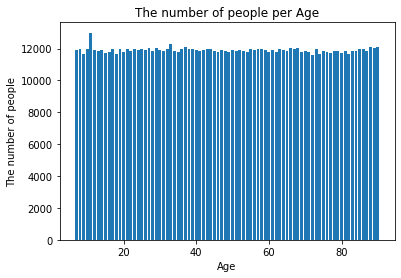

In [69]:
plt.bar(dataset_outliers["Age"].unique(), dataset_outliers["Age"].value_counts())
plt.title("The number of people per Age")
plt.xlabel("Age")
plt.ylabel("The number of people");

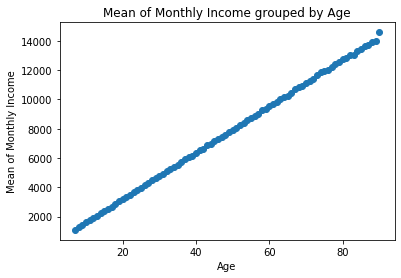

In [70]:
plt.scatter(sorted(dataset_outliers["Age"].unique()), dataset_outliers.groupby("Age").mean()["M_income"])
plt.xlabel("Age")
plt.ylabel("Mean of Monthly Income")
plt.title("Mean of Monthly Income grouped by Age");

There is a point at the top right but I won't deal with the point as an outlier at the moment.

- ### Sex

In [71]:
dataset_outliers["Sex"].value_counts()

Female    442193
Male      440138
X         117669
Name: Sex, dtype: int64

I will randomly replace 50% of X to Female and the rest to Male 

In [72]:
dataset_outliers.loc[
    dataset_outliers.query('Sex == "X"').sample(frac=.5).index,
    "Sex"
] = "Female"
dataset_outliers["Sex"].replace("X", "Male", inplace=True)
dataset_outliers["Sex"].value_counts()

Female    501027
Male      498973
Name: Sex, dtype: int64

- ### M_income

In [73]:
dataset_outliers["M_income"].value_counts().sort_index().index.tolist()[:10]

[0.0, 140.0, 147.0, 154.0, 160.0, 161.0, 168.0, 175.0, 176.0, 180.0]

These are the first 10 examples of "M_income" in Ascending order. Except for `0`, they start from 140.0 and seem continuous values.
So I will deal with only `0`s as outliers.

In [74]:
dataset[dataset_outliers["M_income"] == 0].head()

,Age,Sex,M_income,Work,Color,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Steps
ID,,,,,,,,,,,,,
2,33,Male,0.0,53,blue,5,1,29,20,8,8.35,3750,0.0
54,24,Male,0.0,39,red,9,7,27,21,8,1.48,3500,3500.0
240,41,Female,0.0,53,yellow,1,5,27,20,12,2.25,3000,0.0
311,63,Female,0.0,19,0,9,7,29,2,7,2.89,2500,0.0
398,38,Female,0.0,6,0,1,1,30,20,9,10.44,2000,0.0


**Solution**<br>
Replace the `0`s to the average of `M_income` of the age of the observation.
*For example*
ID: 2
Age: 33
M_income: 0

In this case, I will replace the 0 to the mean of M_income of 33 years old.

In [75]:
def replace_income(x):
    idx = ages.index(x)
    income = income_avg[idx]
    return income

In [76]:
for idx in tqdm(dataset_outliers[dataset_outliers["M_income"] == 0].index):
    dataset_outliers.loc[idx, "M_income"] = replace_income(dataset_outliers.loc[idx, "Age"])

In [77]:
dataset_outliers["M_income"].value_counts().sort_index().index.tolist()[:10]

[140.0, 147.0, 154.0, 160.0, 161.0, 168.0, 175.0, 176.0, 180.0, 182.0]

- ### Work

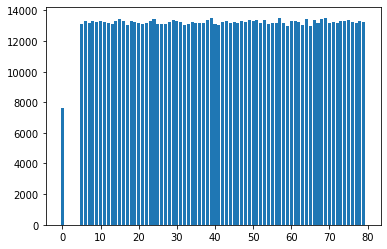

In [78]:
plt.bar(dataset_outliers["Work"].value_counts().sort_index().index, dataset_outliers["Work"].value_counts().sort_index());

In [79]:
print("The number of rows that have 0s in Work column: {}".format(dataset_outliers[dataset_outliers["Work"] == 0].shape[0]))

The number of rows that have 0s in Work column: 7601


As far as I can tell, 0s in `Work` column seem outliers. 
`Work` column doesn't have any correlations with any cother columns. So I will just randomly replace 0 to one of other values that are already in `Work` column. 

In [80]:
work_uniques = sorted(dataset_outliers["Work"].value_counts().index.tolist())
work_uniques = work_uniques[1:]
len(work_uniques)

75

In [81]:
n_sample = dataset_outliers[dataset_outliers["Work"] == 0].shape[0] / len(work_uniques)
for i, work in enumerate(tqdm(work_uniques)):
    dataset_outliers.loc[
        dataset_outliers.query('Work == 0').sample(n=int(n_sample)).index,
        "Work"
    ] = work

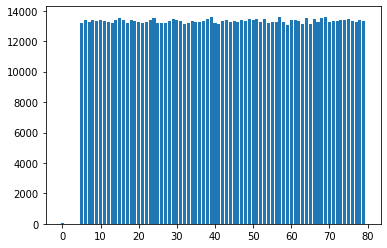

In [82]:
plt.bar(dataset_outliers["Work"].value_counts().sort_index().index, dataset_outliers["Work"].value_counts().sort_index());

In [83]:
rest_idxs = dataset_outliers[dataset_outliers["Work"] == 0].index

In [84]:
for idx in rest_idxs:
    random_idx = np.random.randint(len(work_uniques))
    dataset_outliers.loc[idx, "Work"] = work_uniques[random_idx]

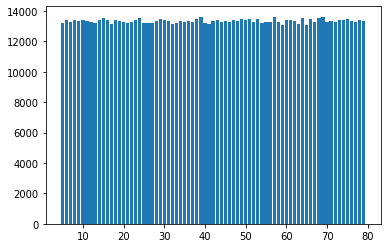

In [85]:
plt.bar(dataset_outliers["Work"].value_counts().sort_index().index, dataset_outliers["Work"].value_counts().sort_index());

- ### Color

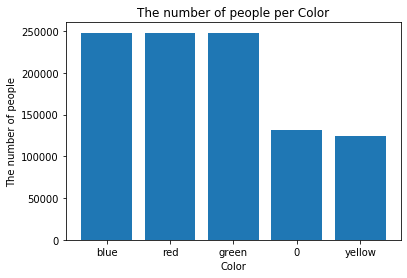

In [86]:
plt.bar(dataset_outliers["Color"].value_counts().index, dataset_outliers["Color"].value_counts())
plt.title("The number of people per Color")
plt.xlabel("Color")
plt.ylabel("The number of people");

As far as I can tell from this graph, `0`s should be replaced `yellow`. 

In [87]:
dataset_outliers["Color"].value_counts()

blue      248198
red       248160
green     248051
0         131158
yellow    124433
Name: Color, dtype: int64

In [88]:
dataset_outliers["Color"] = dataset_outliers["Color"].replace("0", "yellow")
dataset_outliers["Color"].value_counts()

yellow    255591
blue      248198
red       248160
green     248051
Name: Color, dtype: int64

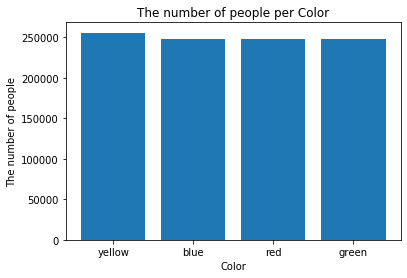

In [89]:
plt.bar(dataset_outliers["Color"].value_counts().index, dataset_outliers["Color"].value_counts())
plt.title("The number of people per Color")
plt.xlabel("Color")
plt.ylabel("The number of people");

- ### Sibs

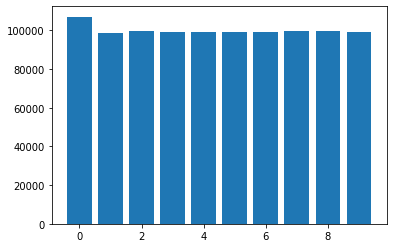

In [90]:
plt.bar(dataset_outliers["Sibs"].value_counts().sort_index().index, dataset_outliers["Sibs"].value_counts().sort_index());

Seems good.

- ### TFP

In [91]:
dataset_outliers["TFP"].value_counts(sort=False)

0      7652
1    109901
2    110364
3    110091
4    110112
5    110452
6    110607
7    110100
8    110481
9    110240
Name: TFP, dtype: int64

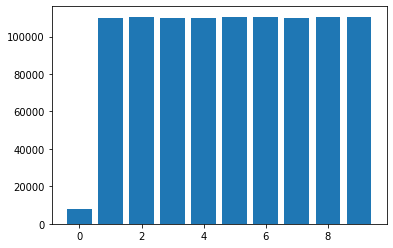

In [92]:
plt.bar(dataset_outliers["TFP"].value_counts().sort_index().index, dataset_outliers["TFP"].value_counts().sort_index());

TFP is short for Top Finish Placement so it shouldn't be 0. What I am going to do is randomly replace the `0`s to one of the other integers in the column already.

In [93]:
tfp_uniques = sorted(dataset_outliers["TFP"].value_counts().index.tolist())
tfp_uniques = tfp_uniques[1:]
len(tfp_uniques)

9

In [94]:
dataset[dataset_outliers["TFP"] == 0].head()

,Age,Sex,M_income,Work,Color,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Steps
ID,,,,,,,,,,,,,
131,22,Male,5830.0,42,green,6,0,20,21,10,3.53,3000,3000.0
312,41,Male,5248.0,35,blue,4,0,21,3,11,1.44,1500,0.0
517,20,X,2840.0,47,blue,2,0,20,3,6,4.12,3000,0.0
735,60,Female,15360.0,20,green,0,0,28,20,6,5.21,2750,0.0
817,89,Male,18156.0,34,red,0,0,20,21,11,1.84,3000,0.0


In [95]:
n_sample = dataset_outliers[dataset_outliers["TFP"] == 0].shape[0] / len(tfp_uniques)
for i, tfp in enumerate(tqdm(tfp_uniques)):
    dataset_outliers.loc[
        dataset_outliers.query('TFP == 0').sample(n=int(n_sample)).index,
        "TFP"
    ] = tfp

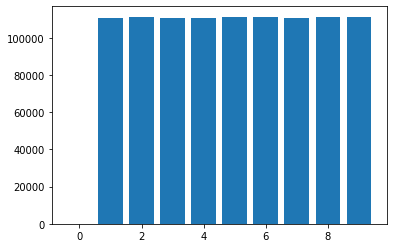

In [96]:
plt.bar(dataset_outliers["TFP"].value_counts().sort_index().index, dataset_outliers["TFP"].value_counts().sort_index());

In [97]:
rest_idxs = dataset_outliers[dataset_outliers["TFP"] == 0].index
rest_idxs

Int64Index([731553, 755950], dtype='int64', name='ID')

In [98]:
for idx in rest_idxs:
    random_idx = np.random.randint(len(tfp_uniques))
    dataset_outliers.loc[idx, "TFP"] = tfp_uniques[random_idx]

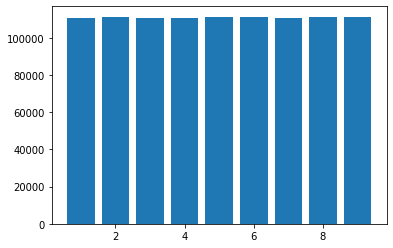

In [99]:
plt.bar(dataset_outliers["TFP"].value_counts().sort_index().index, dataset_outliers["TFP"].value_counts().sort_index());

- ### Ltime

In [100]:
dataset_outliers["Ltime"].value_counts()

27    90793
21    90585
23    90409
28    90310
29    90272
20    90269
22    90014
26    89966
30    89914
25    89857
24    89825
0      7786
Name: Ltime, dtype: int64

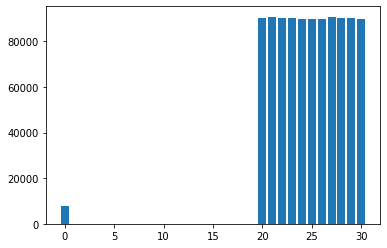

In [101]:
plt.bar(dataset_outliers["Ltime"].value_counts().sort_index().index, dataset_outliers["Ltime"].value_counts().sort_index());

Seems `0`s are outliers in this column. So again will randomly replace `0`s to one the other values in the column already.

In [102]:
ltime_uniques = sorted(dataset_outliers["Ltime"].value_counts().index.tolist())
ltime_uniques = ltime_uniques[1:]
len(ltime_uniques)

11

In [103]:
n_sample = dataset_outliers[dataset_outliers["Ltime"] == 0].shape[0] / len(ltime_uniques)
for i, ltime in enumerate(tqdm(ltime_uniques)):
    dataset_outliers.loc[
        dataset_outliers.query('Ltime == 0').sample(n=int(n_sample)).index,
        "Ltime"
    ] = ltime

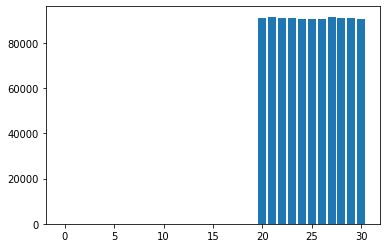

In [104]:
plt.bar(dataset_outliers["Ltime"].value_counts().sort_index().index, dataset_outliers["Ltime"].value_counts().sort_index());

In [105]:
rest_idxs = dataset_outliers[dataset_outliers["Ltime"] == 0].index
rest_idxs

Int64Index([200127, 429576, 508893, 517801, 634110, 671290, 690228, 794160,
            893929],
           dtype='int64', name='ID')

In [106]:
for idx in rest_idxs:
    random_idx = np.random.randint(len(ltime_uniques))
    dataset_outliers.loc[idx, "Ltime"] = ltime_uniques[random_idx]

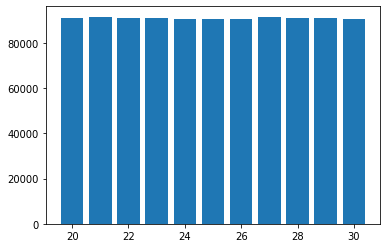

In [107]:
plt.bar(dataset_outliers["Ltime"].value_counts().sort_index().index, dataset_outliers["Ltime"].value_counts().sort_index());

- ### Btime

In [108]:
dataset_outliers["Btime"].value_counts()

19    99685
22    99621
1     99551
2     99314
23    99220
4     99139
12    99125
3     98920
21    98908
20    98895
0      7622
Name: Btime, dtype: int64

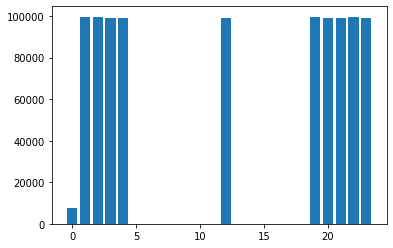

In [109]:
plt.bar(dataset_outliers["Btime"].value_counts().sort_index().index, dataset_outliers["Btime"].value_counts().sort_index());

`Btime` is a column for `bed time` and contains time in military time. So the time `12` should be 0.

In [110]:
dataset_outliers["Btime"] = dataset_outliers["Btime"].replace(12, 0)

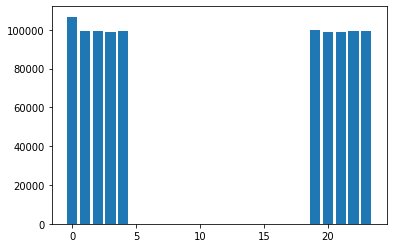

In [111]:
plt.bar(dataset_outliers["Btime"].value_counts().sort_index().index, dataset_outliers["Btime"].value_counts().sort_index());

Now seems good.

- ### Wtime

In [112]:
dataset_outliers["Wtime"].value_counts()

10    124428
11    124344
9     124321
7     124232
5     124200
12    123995
6     123579
8     123102
0       7799
Name: Wtime, dtype: int64

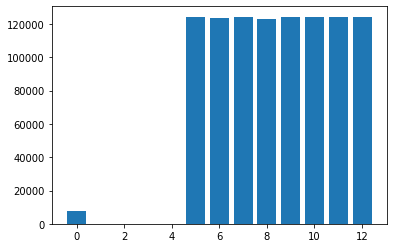

In [113]:
plt.bar(dataset_outliers["Wtime"].value_counts().sort_index().index, dataset_outliers["Wtime"].value_counts().sort_index());

`Wtime` is a column for `wake up time` so I guess `0`s should be something wrong. I can think of those `0`s are made by accident which could be placing `AM` instead of `PM`. So I will replace the `0`s to `12`.

In [114]:
dataset_outliers["Wtime"] = dataset_outliers["Wtime"].replace(0, 12)

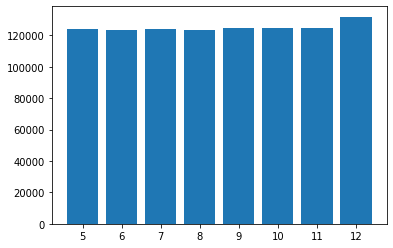

In [115]:
plt.bar(dataset_outliers["Wtime"].value_counts().sort_index().index, dataset_outliers["Wtime"].value_counts().sort_index());

- ### Tsleep

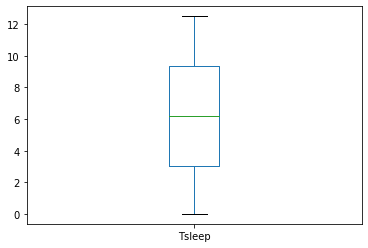

In [116]:
dataset_outliers["Tsleep"].plot("box");

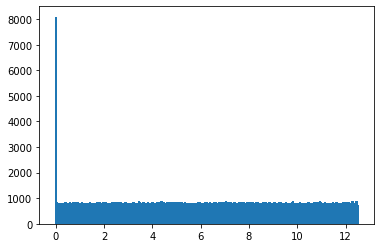

In [117]:
plt.bar(dataset_outliers["Tsleep"].value_counts().sort_index().index, dataset_outliers["Tsleep"].value_counts().sort_index(), width=0.1);

In [118]:
dataset_outliers[dataset_outliers["Tsleep"] != 0].min()["Tsleep"]

0.01

Well, `Tsleep` is a column for `total sleep/night`. From the plot above, I can't say that the `0`s are outliers. Because it could be happened that don't sleep a night. And also the minimum value of `Tsleep` except for `0` is `0.01` which you can see the result in above cell.
So I will deal these `0`s as valid values.

- ### Caloric and Steps

In [119]:
dataset_outliers["Caloric"].value_counts().sort_index()

0        7679
1500    99481
1750    98731
2000    99255
2250    99384
2500    99350
2750    98871
3000    99585
3250    99451
3500    99382
3750    98831
Name: Caloric, dtype: int64

|Caloric|Steps|
|-|-|
|values|values|
|0s|values|
|values|0s|
|0s|0s|

As I mentioned previously, I will deal with the columns `Caloric` and `Steps` at the same time.
1. I will compensate the `0`s in `Caloric` with values in `Steps` of the same rows.
2. Randomly replace the rest `0`s to one of the other values that are already in `Caloric`.
3. Drop `Steps` column because `Caloric` will end up having correlation `1` with `Steps` column. For more information, please take a look the `Missing Values` section.

In [120]:
dataset_outliers[(dataset["Caloric"] == 0) & (dataset_outliers["Steps"] != 0)].shape

(5105, 13)

In [121]:
steps_vals = dataset_outliers[(dataset["Caloric"] == 0) & (dataset_outliers["Steps"] != 0)]["Steps"].values

In [122]:
idxs = dataset_outliers[(dataset["Caloric"] == 0) & (dataset_outliers["Steps"] != 0)].index
idxs[:5]

Int64Index([103, 599, 851, 1154, 1552], dtype='int64', name='ID')

In [123]:
for i, idx in enumerate(tqdm(idxs)):
    dataset_outliers.loc[idx, "Caloric"] = steps_vals[i]

In [124]:
dataset_outliers["Caloric"].value_counts().sort_index()

0.0         2574
1500.0     99971
1750.0     99244
2000.0     99795
2250.0     99889
2500.0     99871
2750.0     99399
3000.0    100094
3250.0     99931
3500.0     99876
3750.0     99356
Name: Caloric, dtype: int64

In [125]:
caloric_uniques = sorted(dataset_outliers["Caloric"].value_counts().index.tolist())
caloric_uniques = caloric_uniques[1:]
len(caloric_uniques)

10

In [126]:
n_sample = dataset_outliers[dataset_outliers["Caloric"] == 0].shape[0] / len(caloric_uniques)
for i, caloric in enumerate(tqdm(caloric_uniques)):
    dataset_outliers.loc[
        dataset_outliers.query('Caloric == 0').sample(n=int(n_sample)).index,
        "Caloric"
    ] = caloric

In [127]:
rest_idxs = dataset_outliers[dataset_outliers["Caloric"] == 0].index
rest_idxs

Int64Index([373060, 23588, 512086, 910566], dtype='int64', name='ID')

In [128]:
for idx in rest_idxs:
    random_idx = np.random.randint(len(caloric_uniques))
    dataset_outliers.loc[idx, "Caloric"] = caloric_uniques[random_idx]

In [129]:
dataset_outliers["Caloric"].value_counts().sort_index()

1500.0    100229
1750.0     99501
2000.0    100052
2250.0    100146
2500.0    100129
2750.0     99656
3000.0    100352
3250.0    100189
3500.0    100133
3750.0     99613
Name: Caloric, dtype: int64

- ### Drop `Steps` column

In [130]:
dataset_outliers = dataset_outliers.drop("Steps", axis=1)

In [131]:
dataset = dataset_outliers

- ### Check the whole dataset

In [132]:
dataset.describe()

,Age,M_income,Work,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000
mean,48.483133,7760.276367,42.019234,4.466983,5.002215,24.998775,11.414200,8.529395,6.195786,2624.96375
std,24.284768,5840.091797,21.652200,2.888980,2.581155,3.162859,9.620608,2.303460,3.632695,717.84827
min,7.000000,140.000000,5.000000,0.000000,1.000000,20.000000,0.000000,5.000000,0.000000,1500.00000
25%,27.000000,2968.000000,23.000000,2.000000,3.000000,22.000000,2.000000,7.000000,3.050000,2000.00000
50%,48.000000,6237.000000,42.000000,4.000000,5.000000,25.000000,4.000000,9.000000,6.190000,2500.00000
75%,70.000000,11368.000000,61.000000,7.000000,7.000000,28.000000,21.000000,11.000000,9.340000,3250.00000
max,90.000000,27000.000000,79.000000,9.000000,9.000000,30.000000,23.000000,12.000000,12.500000,3750.00000


# Categorical Variables

In this section, I will work on categorical variables.

In [133]:
dataset.head()

,Age,Sex,M_income,Work,Color,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric
ID,,,,,,,,,,,,
1,11,Male,3058.000000,19,green,4,5,27,23,10,5.01,2000.0
2,33,Male,5228.870605,53,blue,5,1,29,20,8,8.35,3750.0
3,37,Male,3108.000000,27,green,5,8,22,23,10,1.78,2250.0
4,88,Male,23408.000000,12,green,0,6,26,2,7,11.44,1750.0
5,90,Male,17840.000000,50,yellow,3,9,27,19,11,11.44,3750.0


In [134]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 1 to 70496
Data columns (total 12 columns):
Age         1000000 non-null int64
Sex         1000000 non-null object
M_income    1000000 non-null float32
Work        1000000 non-null int64
Color       1000000 non-null object
Sibs        1000000 non-null int64
TFP         1000000 non-null int32
Ltime       1000000 non-null int32
Btime       1000000 non-null int64
Wtime       1000000 non-null int64
Tsleep      1000000 non-null float64
Caloric     1000000 non-null float64
dtypes: float32(1), float64(2), int32(2), int64(5), object(2)
memory usage: 127.7+ MB


List of categorical variables
- Sex: This is not an ordinal variable.
- Color: This is not an ordinal variable.
- TFP: This is an ordinal variable.

- ### Sex

In [135]:
dummies_sex = pd.get_dummies(dataset["Sex"])
dataset = dataset.drop("Sex", axis=1)
dataset = dataset.join(dummies_sex)
dataset.head()

,Age,M_income,Work,Color,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Female,Male
ID,,,,,,,,,,,,,
1,11,3058.000000,19,green,4,5,27,23,10,5.01,2000.0,0,1
2,33,5228.870605,53,blue,5,1,29,20,8,8.35,3750.0,0,1
3,37,3108.000000,27,green,5,8,22,23,10,1.78,2250.0,0,1
4,88,23408.000000,12,green,0,6,26,2,7,11.44,1750.0,0,1
5,90,17840.000000,50,yellow,3,9,27,19,11,11.44,3750.0,0,1


- ### Color

In [136]:
dummies_color = pd.get_dummies(dataset["Color"])
dataset = dataset.drop("Color", axis=1)
dataset = dataset.join(dummies_color)
dataset.head()

,Age,M_income,Work,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Female,Male,blue,green,red,yellow
ID,,,,,,,,,,,,,,,,
1,11,3058.000000,19,4,5,27,23,10,5.01,2000.0,0,1,0,1,0,0
2,33,5228.870605,53,5,1,29,20,8,8.35,3750.0,0,1,1,0,0,0
3,37,3108.000000,27,5,8,22,23,10,1.78,2250.0,0,1,0,1,0,0
4,88,23408.000000,12,0,6,26,2,7,11.44,1750.0,0,1,0,1,0,0
5,90,17840.000000,50,3,9,27,19,11,11.44,3750.0,0,1,0,0,0,1


- ### TFP

In [137]:
dataset["TFP"].value_counts().sort_index().index.tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

Currently, 1st place corresponds to integer `1`. And `9th` place corresponds to integer `9`.
So I will change the order to opposite.

|Current|Fixed|
|-|-|
|1st -> 1|1st -> 9|
|2nd -> 2|2nd -> 8|
|:|:|
|8th -> 8|8th -> 2|
|9th -> 9|9th -> 1|

In [138]:
tfp_dict = {
    1: 9,
    2: 8,
    3: 7,
    4: 6,
    5: 5,
    6: 4,
    7: 3,
    8: 2,
    9: 1,
}

In [139]:
f = lambda x: tfp_dict[x]
dataset["TFP"] = dataset["TFP"].map(f)

# Multiple Value Ranges

I will normalize each column by using Min-Max Normalization.

## Min-Max Normalization
$$
y = \frac{x-x_{min}}{x_{max} - x_{min}}
$$

Where<br>
$y$: A normalized value.<br>
$x$: A value before normalized.<br>
$x_{min}$: The minimum in a column being normalized.<br>
$x_{max}$: The maximum in  a column being normalized.<br>

In [140]:
def minmax_norm(df_norm, column):
    """
    Min-Max Normalization.
    
    Parameters
    ----------------
    df_norm: Pandas DataFrame
    
    column: str
        The column name to normalize
    
    Return
    ---------
    df_norm: Pandas DataFrame 
    """
    x_min = df_norm[column].min()
    x_max = df_norm[column].max()
    f = lambda x: (x - x_min) / (x_max - x_min)
    df_norm[column] = df_norm[column].map(f)
    return df_norm

In [141]:
dataset .head()

,Age,M_income,Work,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Female,Male,blue,green,red,yellow
ID,,,,,,,,,,,,,,,,
1,11,3058.000000,19,4,5,27,23,10,5.01,2000.0,0,1,0,1,0,0
2,33,5228.870605,53,5,9,29,20,8,8.35,3750.0,0,1,1,0,0,0
3,37,3108.000000,27,5,2,22,23,10,1.78,2250.0,0,1,0,1,0,0
4,88,23408.000000,12,0,4,26,2,7,11.44,1750.0,0,1,0,1,0,0
5,90,17840.000000,50,3,1,27,19,11,11.44,3750.0,0,1,0,0,0,1


In [142]:
numeric_cols = ["Age",
                        "M_income",
                        "Work",
                        "Sibs",
                        "TFP",
                        "Ltime",
                        "Btime",
                        "Wtime",
                        "Tsleep",
                        "Caloric"] 

In [143]:
for col in tqdm(numeric_cols):
    dataset = minmax_norm(dataset, column=col)
dataset.head()

,Age,M_income,Work,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Female,Male,blue,green,red,yellow
ID,,,,,,,,,,,,,,,,
1,0.048193,0.108637,0.189189,0.444444,0.500,0.7,1.000000,0.714286,0.4008,0.222222,0,1,0,1,0,0
2,0.313253,0.189459,0.648649,0.555556,1.000,0.9,0.869565,0.428571,0.6680,1.000000,0,1,1,0,0,0
3,0.361446,0.110499,0.297297,0.555556,0.125,0.2,1.000000,0.714286,0.1424,0.333333,0,1,0,1,0,0
4,0.975904,0.866270,0.094595,0.000000,0.375,0.6,0.086957,0.285714,0.9152,0.111111,0,1,0,1,0,0
5,1.000000,0.658972,0.608108,0.333333,0.000,0.7,0.826087,0.857143,0.9152,1.000000,0,1,0,0,0,1


In [144]:
dataset.describe()

,Age,M_income,Work,Sibs,TFP,Ltime,Btime,Wtime,Tsleep,Caloric,Female,Male,blue,green,red,yellow
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.499797,0.283704,0.500260,0.496331,0.499723,0.499877,0.496270,0.504199,0.495663,0.499984,0.501027,0.498973,0.248198,0.248051,0.248160,0.255591
std,0.292588,0.217427,0.292597,0.320998,0.322644,0.316286,0.418287,0.329066,0.290616,0.319044,0.499999,0.499999,0.431968,0.431882,0.431945,0.436193
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240964,0.105287,0.243243,0.222222,0.250000,0.200000,0.086957,0.285714,0.244000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.493976,0.226992,0.500000,0.444444,0.500000,0.500000,0.173913,0.571429,0.495200,0.444444,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.759036,0.418019,0.756757,0.777778,0.750000,0.800000,0.913043,0.857143,0.747200,0.777778,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 1 to 70496
Data columns (total 16 columns):
Age         1000000 non-null float64
M_income    1000000 non-null float64
Work        1000000 non-null float64
Sibs        1000000 non-null float64
TFP         1000000 non-null float64
Ltime       1000000 non-null float64
Btime       1000000 non-null float64
Wtime       1000000 non-null float64
Tsleep      1000000 non-null float64
Caloric     1000000 non-null float64
Female      1000000 non-null uint8
Male        1000000 non-null uint8
blue        1000000 non-null uint8
green       1000000 non-null uint8
red         1000000 non-null uint8
yellow      1000000 non-null uint8
dtypes: float64(10), uint8(6)
memory usage: 129.6 MB


# Create a CSV

In [146]:
dataset.to_csv(str(cleaned_csv_path))